## Prediction of pick numbers

#### Import Framework and libraries

In [1]:
import ML_Framework_refactored as fw
import numpy as np

#### Define random seed

In [2]:
random_state = 777

#### Load the data object

In [3]:
data = fw.NBA_data_ext()

#### Define Random Forest baseline model (no hyperparameter tuning)

In [4]:
baseline_model = fw.random_forest()

#### Train and validate the baseline model on the data using cross-validation

In [5]:
conf_matrix,precision,accuracy,recall,f1_score,baseline_model = fw.skf_cross_val(
    X=data.X, y=data.y, model=baseline_model.model, number_of_splits=5, random_state=random_state
    )

#### Visualize the results

In [6]:
correct_pred_list = []
correct_preds = []
for i in range(len(conf_matrix)):
    l = np.diagonal(np.array(conf_matrix[i]))[1:]
    correct_pred_list.append(l)

for j in correct_pred_list:
    counter = 0
    for k in j:
        if k > 0:
            counter += 1
            # print('j = {}'.format(j),'k = {}'.format(k),'counter = {}'.format(counter),sep='\n')
    correct_preds.append(counter)
print("Number of correct picks (from 60) per split in cross validation: ",correct_preds,sep='\n')

Number of correct picks (from 60) per split in cross validation: 
[3, 5, 4, 10, 4]


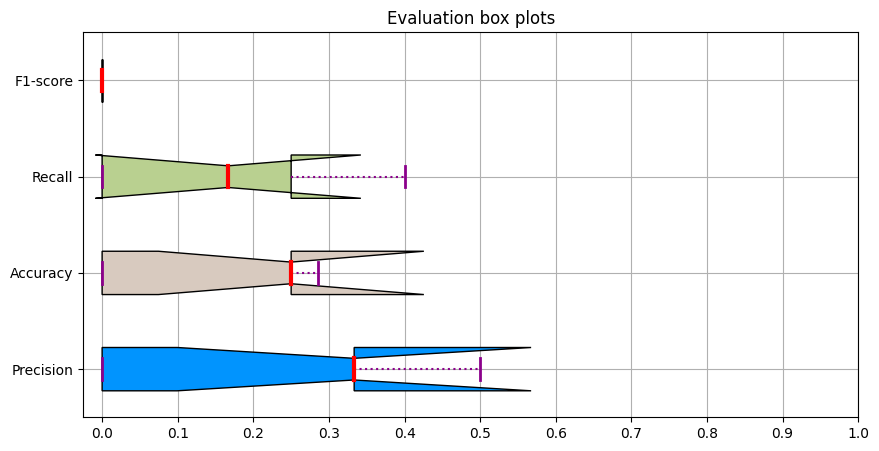

In [7]:
eval_data = [precision,accuracy,recall,f1_score]
fw.boxplot_eval_scores(eval_data,fig_height=10,fig_width=5)

Olvasni:
- (1.) Literature review (college basketball / basketball stat analysis)
- (4.) Latex file review


Implementálni:
- (3.) Random Forest + XGBoost
- (2.) hyperparameter tuning

#### Hyperparameter grid

In [8]:
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 300, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(5, 75, num = 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 40, 75, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4, 5], 'bootstrap': [True, False]}


#### Separate train and test set for cross-validation

In [9]:
train_data = data.df[data.df.iloc[:,25]<2020]
test_data = data.df[data.df.iloc[:,25]>=2020]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:,:-1])
y_train = train_data.iloc[:,-1]
X_test = scaler.fit_transform(test_data.iloc[:,:-1])
y_test = test_data.iloc[:,-1]

#### Run GridSearchCV on the Random Forest model

In [10]:
conf_matrix_gscv,precision_gscv,accuracy_gscv,recall_gscv,f1_score_gscv,gs_cv_gscv = fw.gridsearch_cv(
    X_train=X_train,y_train=y_train,
    model=baseline_model,
    number_of_splits=2,
    param_grid=param_grid,
    random_state=random_state
    )

Fitting 2 folds for each of 432 candidates, totalling 864 fits
